In [1]:
import itertools
from myutils import Preprocessing as pre
from myutils import Datasets as ds
from myutils import Helpers as h
from myutils import Complexity_Measures as cm
import numpy as np
import os
import pandas as pd


#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

In [2]:
x_train, y_train, x_test, y_test = ds.ALL_NUMBERS()

# AutoEncoder

In [46]:
preprocessing_name = "Autoencoder"


os.system("rm -rf data/"+preprocessing_name+"/*")

for subset in itertools.combinations([i for i in range(10)],2):


    #mkdir
    subset_name = str(subset).replace("(","").replace(")","").replace(" ","")
    os.mkdir("data/{}/{}".format(preprocessing_name,subset_name))
    
    #log progress
    print("processing subset:",subset_name)

    x_train_subset = x_train[(y_train == subset[0]) | (y_train == subset[1])]
    y_train_subset = y_train[(y_train == subset[0]) | (y_train == subset[1])]
    y_train_subset_binary = np.where(y_train_subset == subset[0], 0, y_train_subset)
    y_train_subset_binary = np.where(y_train_subset_binary == subset[1], 1, y_train_subset_binary)

    x_test_subset = x_test[(y_test == subset[0]) | (y_test == subset[1])]
    y_test_subset = y_test[(y_test == subset[0]) | (y_test == subset[1])]
    y_test_subset_binary = np.where(y_test_subset == subset[0], 0, y_test_subset)
    y_test_subset_binary = np.where(y_test_subset_binary == subset[1], 1, y_test_subset_binary)

    x_train_subset = x_train_subset.reshape(x_train_subset.shape[0],784)
    x_test_subset = x_test_subset.reshape(x_test_subset.shape[0],784)

    x_train_pre , x_test_pre, hist = pre.Autoencoder(x_train_subset,x_test_subset,outputsize=4,epochs=1)
    loss = np.array(hist.history["loss"])
    
    #scale between 0 and 1
    #x_train_pre = pre.minmax_scaler(x_train_pre,min=0,max=1)
    #x_test_pre = pre.minmax_scaler(x_test_pre,min=0,max=1)

    for type, dataset in zip(["x_train","x_test","y_train","y_test","y_train_binary","y_test_binary","loss"],[x_train_pre,x_test_pre,y_train_subset,y_test_subset,y_train_subset_binary,y_test_subset_binary,loss]):
        np.save("data/"+preprocessing_name+"/"+str(subset_name)+"/"+type+".npy",dataset)

processing subset: 0,1
396/396 [==============================] - 4s 9ms/step - loss: 0.0524
processing subset: 0,2
372/372 [==============================] - 3s 8ms/step - loss: 0.0853
processing subset: 0,3
377/377 [==============================] - 4s 9ms/step - loss: 0.0918
processing subset: 0,4
368/368 [==============================] - 3s 9ms/step - loss: 0.0918
processing subset: 0,5
355/355 [==============================] - 3s 9ms/step - loss: 0.0795
processing subset: 0,6
371/371 [==============================] - 3s 8ms/step - loss: 0.0980
processing subset: 0,7
381/381 [==============================] - 3s 8ms/step - loss: 0.0819
processing subset: 0,8
368/368 [==============================] - 3s 8ms/step - loss: 0.0897
processing subset: 0,9
371/371 [==============================] - 3s 6ms/step - loss: 0.0712
processing subset: 1,2
397/397 [==============================] - 4s 8ms/step - loss: 0.0494
processing subset: 1,3
403/403 [==============================] - 4s 8

In [3]:
data = ds.get_preprocessed_datasets("Autoencoder","raw")

raw not found


In [4]:
result = dict() 
for subset in sorted(data["Autoencoder"]):

    fischer = cm.fischer_discriminat_ratio(x=data["Autoencoder"][subset]["x_train"].astype("int"),y=data["Autoencoder"][subset]["y_train"])
    result[subset] = fischer

In [5]:
pd.DataFrame.from_dict(result,orient="index")

,0
"0,1",0.178600
"0,2",0.359088
"0,3",0.316373
"0,4",0.455648
"0,5",0.515672
"0,6",0.623304
"0,7",0.183641
"0,8",0.164072
"0,9",0.541000
"1,2",0.401258


reshape_shape (12593, 2, 2)


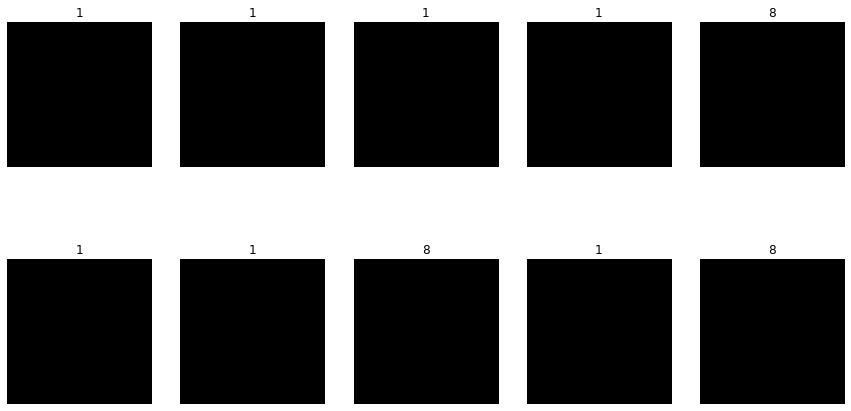

In [6]:
#plot grid of 1,8
h.plot_grid(data["Autoencoder"]["1,8"]["x_train"],data["Autoencoder"]["1,8"]["y_train"])

# Check the pair of numbers 1 and 8 manually

In [8]:
x_train_18 = x_train[(y_train == 1) | (y_train == 8)]
y_train_18 = y_train[(y_train == 1) | (y_train == 8)]
y_test_18 = y_test[(y_test == 1) | (y_test == 8)]
x_test_18 = x_test[(y_test == 1) | (y_test == 8)]

x_train_18 = x_train_18.reshape(x_train_18.shape[0],784)
x_test_18 = x_test_18.reshape(x_test_18.shape[0],784)

x_train_18_pre , x_test_18_pre, hist = pre.Autoencoder(x_train_18,x_test_18,outputsize=4,epochs=1)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

394/394 [==============================] - 3s 7ms/step - loss: 0.0579


In [9]:
cm.fischer_discriminat_ratio(x=x_train_18_pre,y=y_train_18)

0.20281031065117897

reshape_shape (12593, 2, 2)


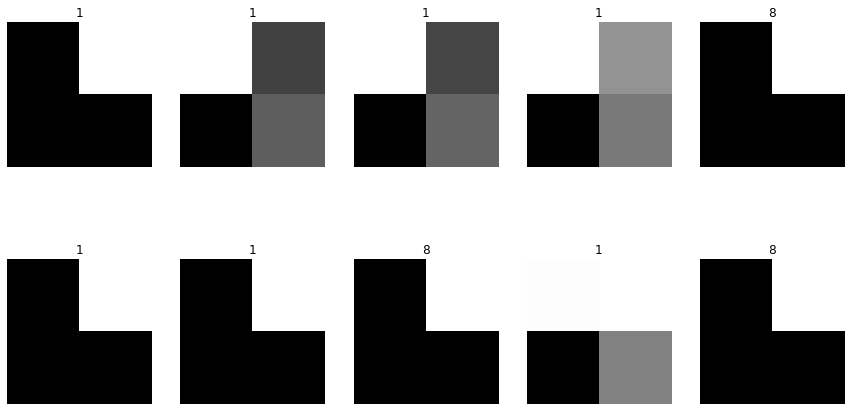

In [10]:
h.plot_grid(x_train_18_pre,y_train_18)